In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd
import scipy as sci
from scipy import stats

# Theoretical Background
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

A central problem in quantum mechanics is the following: what's the probability amplitude that the following will happen: $(x_a,t_a) \rightarrow (x_b,t_b)$? This problem is usually described in the following form:

$$\psi(x_b,t_b) = \int G(x_a,t_a;x_b, t_b)\psi(x_a,t_a)dx_a$$

Where $G$ is a green's function that represents the _propagator_ of the system. A system is said to be fully solved once you have the propagator. For the typical schrodinger picture, it looks a bit like this


$$G = \frac{1}{i\hbar}\Theta(t_b - t_a)K(x_a,t_a;x_b, t_b)$$

with $\Theta$ being the Heaviside step function and $K$ being the _kernel_ of the SE (kernel and propagator are sometimes used interchangably). 

A simple case is the free particle $V(x) = 0$ where the g.f is equivalent to

$$G(b,a) = \sqrt{\frac{m}{2\pi\hbar i (t_b - t_a)}}e^{\frac{im(x_b - x_a)^2}{2\hbar (t_b - t_a)}}$$


This seems a bit unintuitive, so a physicist named Richard Feynman sought out to find a different (yet, obviously equivilent) formulation, which can be motivated as follows: 

Consider the action functional ($F: f(x)\rightarrow g(x)$) $S[x,\dot{x}] = \int_{t_a}^{t_b} dt L[x,\dot{x}]$ of a free particle, which is known for taking the following form:

$$S[b,a] = \frac{m(x_b - x_a)^2}{2(t_b - t_a)}$$


Looking at the Green function for a free particle above, one can relate the two as follows:

$$G = \sqrt{\frac{m}{2\pi\hbar i (t_b - t_a)}}e^{iS/\hbar}$$


i.e a quantum system's propagator could be related to its action (and equivilently, its lagrangian). Feynman considered a generalization of this as

$$G(b,a) = \sum_{paths}e^{iS[b,a]/\hbar}$$

In other words, you can describe the amplitude of a particle going from a point in spacetime to another point in space time by considering every possible path (straight line, zig-zag, dancing around in time, etc) and summing all of their amplitudes! This is called the _sum over histories approach_ because you're considering every possible trajectory from $(x_a,t_a) \rightarrow (x_b, t_b)$

### Example: Free Particle

Consider a quantum system such that $V(x) = 0$. Our task is to solve get the Wavefunction of this system without resorting to any quantum operators (most notably $\hat{H}$). 

The first step is writing down the system's Action:

$$S = \int_{t_a}^{t_b}dt (T - V) \\ = \int_{t_a}^{t_b}dt T$$

which is simply

$$S = \int_{t_a}^{t_b}dt \frac{m}{2}\dot{x}^2$$

Given that there's no time-dependence, and also that $F = -\frac{dV(x)}{dx} = 0$, we see that the action is

$$S[b,a] = \frac{m(x_b - x_a)^2}{2(t_b - t_a)}$$

as mentioned above, this solution allows us to write the Green's Function as

$$G(b,a) = \frac{e^{iS/\hbar}}{\sqrt{2\pi i (t_b - t_a)}} $$



### Example: Harmonic Oscillator


V ~ x^2


### Simulating Path Integrals

Say we now want to compute path integrals and, say, estimate $|\psi(x,t)|^2$ of some system. Looking at the analytical solutions above, one can quickly see that there are some work arounds necessary to implement. The first is simply discretizing the space, i.e rather than considering a continuous path, we assume a lattice that the particle dances around on. Another issue is that we integrate the exponential of $iS/\hbar$, which makes the integral much harder to calculate (and in fact, not likely to converge). We resolve this by applying a Wick transformation, $t \rightarrow -it$ which _rotates the lagrangian into the hamiltonian_ and therefore gives us:

$$S = \int dt L = i\int d\tau H$$

where $\tau = -it$. These adgustments gives us the following:

$$G(x,-i\tau;x_0,0) = A\int e^{\epsilon E(x_j)}dx_1\dots dx_{N-1}$$

where we consider $N$ time-points separated by $\epsilon$ indexed by $j$ such that $\tau = j\epsilon$. $E$ is the total energy along the path and is approximated as

$$E = \sum_{j=1}^N \left[\frac{m}{2}\left(\frac{x_j - x_{j-1}}{\epsilon}\right)^2 + V\left(\frac{x_j + x_{j-1}}{2}\right)\right]$$

from $G$ we get the probability density as

$$|\psi(x)|^2 = \frac{1}{Z}G(x,-i\tau; x,0)$$




In [2]:
def MCMC(p, z0, sigma, n_samples=100, burn_in=0, m=1):
    samples = np.zeros(n_samples)
    samples[0] = z0
    z = z0
    l_cur = p(z)
    iter = 0
    iters = (n_samples * m) + burn_in
    innov = np.random.normal(loc=0, scale=sigma, size=iters)
    u = np.random.rand(iters)
    while iter < iters:
        cand = z + innov[iter]
        l_cand = p(cand)
        if l_cand / l_cur > u[iter]:
            z = cand
            l_cur = l_cand
        if iter > burn_in and iter % m == 0:
            samples[(iter - burn_in) // m] = z
        iter += 1
    return samples

In [3]:
a = MCMC(stats.norm.pdf,3, 1, n_samples=1000, burn_in=100, m=10)

Text(0, 0.5, 'S(x_i)')

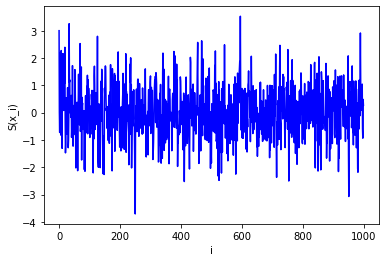

In [4]:
plt.plot(a,color='blue')
plt.xlabel('i')
plt.ylabel('S(x_i)')

In [5]:
b = [sum(a[:i]) for i in range(len(a)-1)]

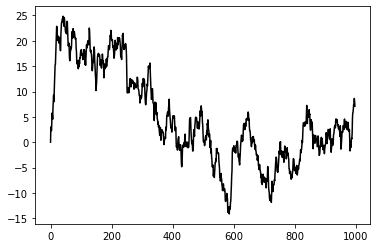

In [6]:
plt.plot(b,color='black')

In [7]:
import random

N = 100
M = 101
path, probs= np.zeros((2,M))

V = lambda x,k=1: k*0.5*x**2
def energy(path, V=V):
    return sum([0.5*((path[i+1] - path[i]))**2 + V((path[i+1] + path[i])*0.5) for i in range(len(path)-1)])

In [8]:
path = MCMC(stats.norm.pdf,3, 1)

In [9]:
test = [energy(MCMC(stats.norm.pdf,3, 1)) for i in range(1000)]

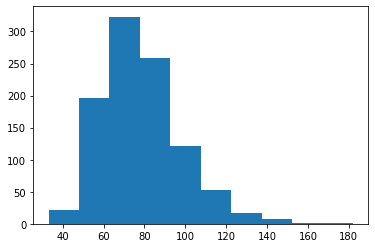

In [10]:
plt.hist(test)

analytical = lambda x: 1/(2*pi)

In [11]:
test1 = [energy(MCMC(stats.maxwell.pdf,3, 1)) for i in range(1000)]

(array([ 22., 149., 322., 269., 150.,  58.,  16.,  10.,   2.,   2.]),
 array([ 89.73031095, 113.9328113 , 138.13531166, 162.33781201,
        186.54031236, 210.74281271, 234.94531306, 259.14781341,
        283.35031377, 307.55281412, 331.75531447]),
 <BarContainer object of 10 artists>)

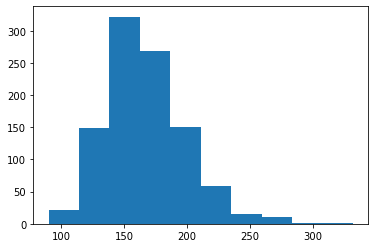

In [12]:
plt.hist(test1)

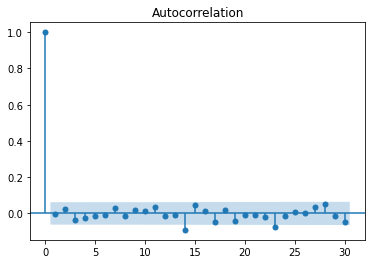

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(np.array(test1))
plt.show()

import numpy as np
import matplotlib.pyplot as plt
import time
import random

def V_Harm(lamda,x):
    return 0.5* m* (omega**2) * (x**2)


def Action(V,x1,x2,x):
    S = 0.5 * m * ( (x1 - x)**2 + (x2 - x)**2) + V(lamda,x)  
    return S  

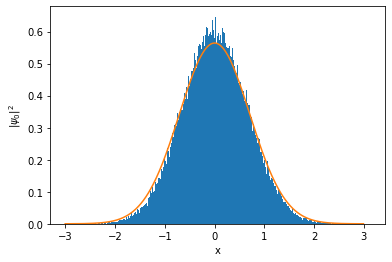

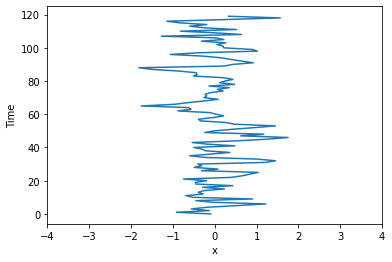

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random
# %%

#------------------------------------------------------------------
# The following equations are written in natural units 
# hcross = c = 1

# Action
def V_Harm(lamda,x):
    return 0.5* m* (omega**2) * (x**2)


def Action(V,x1,x2,x):
    S = 0.5 * m * ( (x1 - x)**2 + (x2 - x)**2) + V(lamda,x)  
    return S  



def MC_sweep(path0,Ntau,h,V):
    accept_rate = 0
    path = path0

    index = np.arange(0,Ntau,1)
    random.shuffle(index)
    
    for i in range(Ntau):
        t = index[i]
        tmin = (t + Ntau - 1)% Ntau  # periodic boundary conditions
        tplu = (t + 1) % Ntau 
        x_new = path[t] + h * (random.random() - 0.5)
        S_old = Action(V,path[tplu],path[tmin],path[t])
        S_new = Action(V,path[tplu],path[tmin],x_new)
        if random.random() < np.exp( - (S_new - S_old) ):
            path[t] = x_new
            accept_rate += 1/Ntau

    h = h * accept_rate/idrate

    return path, h


# %%

dt = 1
Ntau = int(120/dt) # Number of time slices
lamda = 2
path = []
h = 0.1
m = 1 * dt
omega = 1 * dt 
idrate = 0.8
time_arr = np.arange(0,Ntau,1)
#path0 = np.array([random.random() for i in range(Ntau)])

path= np.zeros(Ntau)



for i in range(100):
    path, h = MC_sweep(path,Ntau,h,V_Harm)
    path_arr.append(list(path))

thermalized_path = path
#%%

N = 1000
Nsep = 12
path_arr = []


for i in range(N):
    h = 0.1
    path = thermalized_path
    for j in range(Nsep):
        path, h = MC_sweep(path,Ntau,h,V_Harm)
    path_arr.append(list(path))


path_arr_hist = np.array(path_arr).flatten()
#%%

# Analytical solution
x = np.arange(-3,3,0.01)
psi0 = np.exp(- m*omega * x**2) * np.sqrt(m*omega/np.pi)

#%%
plt.hist(path_arr_hist,bins=500,density=True)
plt.plot(x,psi0)
plt.xlabel("x")
plt.ylabel(r"$|\psi_0|^2$")
plt.savefig("Harmonic_oscillator_ground_state_1000_runs.png",dpi=400)
plt.show()
plt.close()
#%%

plt.plot(path_arr[N-1], time_arr)
plt.xlabel("x")
plt.xlim((-4,4))
plt.ylabel("Time")
plt.savefig("Harmonic_oscillator_single_path.png",dpi=400)
plt.show()
plt.close()

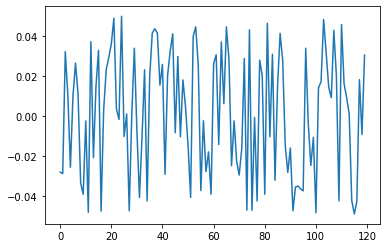

In [61]:
a = MC_sweep(np.zeros(120),120,0.1,V_Harm)
plt.plot(a[0])

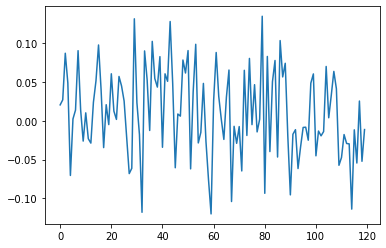

In [66]:
b = MC_sweep(a[0],120,0.1,V_Harm)

plt.plot(b[0])

In [83]:
def metroboomin(initpath,h,V):
    path = initpath
    N = len(path)
    js = np.arange(0,N,1)
    np.random.shuffle(js)
    
    for i in range(js):
        t
    return js
        

In [82]:
metroboomin([1,2,3,4],4,3)

[3, 1, 2]

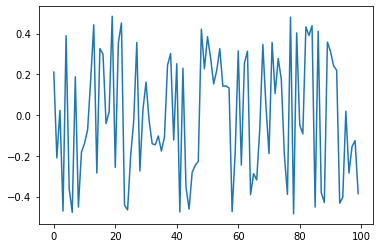

In [110]:
plt.plot([random.random() - 0.5 for i in range(100)])

In [129]:
MC_sweep(np.zeros(116),116,0.1,V_Harm)

(array([ 0.02751089, -0.00631463, -0.0351305 ,  0.03876838,  0.02676192,
        -0.03175558, -0.02336529,  0.03048447,  0.02587518,  0.00487051,
         0.03339117,  0.04890738, -0.00695318, -0.0339352 ,  0.02044413,
        -0.00534434, -0.02675675,  0.04948564, -0.00260038, -0.03377387,
         0.04800858, -0.00172971,  0.03990242,  0.01226009, -0.03019622,
        -0.02506906,  0.01460777, -0.01349118, -0.03281783,  0.03493285,
        -0.02342967, -0.03290259,  0.02457841, -0.01914644, -0.03544314,
         0.03326172, -0.00918662,  0.0271064 ,  0.03858563,  0.00739856,
        -0.01201254, -0.01102642, -0.03134702,  0.03585479,  0.01590548,
         0.02674517, -0.03653516, -0.00382612,  0.03711049, -0.02031955,
         0.04904829, -0.02175878, -0.04349406,  0.00345078,  0.04772834,
         0.00437939,  0.02917357,  0.03351682, -0.03126562,  0.03189954,
        -0.01985591,  0.01761257, -0.04162165, -0.03351771,  0.04567229,
        -0.03498002, -0.00803314,  0.03367518, -0.0